# Intro to Unsupervised Learning 
It's all about clustering PCA. 

Goals: 
* Understand what unsupervised learning is 
* Assess what scenarios could use $k$-means
* Articulate the methodology used by $k$-means
* Apply KMeans from sklearn.cluster to a relevant dataset
* Select the appropriate number of clusters using $k$-means and the elbow method
* Evaluate the weaknesses and remedies to $k$-means
* Apply Principal component analysis 

## Unsupervised Learning 
No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).
![](https://learn.g2.com/hs-fs/hubfs/unsupervised-learning.png?width=700&name=unsupervised-learning.png)

## Curse of Dimensionality
[Learn.co - Curse of Dimensionality](https://learn.co/tracks/module-4-data-science-career-2-1/big-data-deep-learning-and-natural-language-processing/section-33-principal-component-analysis/curse-of-dimensionality)

## Clustering Methods
[Clustering_Notebook](https://github.com/Amberlynnyandow/clustering_seattle-ds/blob/master/kmeans-flatiron_edited-by-gd.ipynb)


## Principle Component Analysis

Think of the predictors in your dataset as dimensions in what we can usefully call "feature space". If we're predicting house prices, then we might have a 'square feet' dimension or a 'number of bathrooms' dimension, etc. Then each record (of a house or a house sale, say) would be represented as a point (or vector) in this feature space. Some would score higher on the 'latitude' dimension or lower on the 'number of bedrooms' dimension. But are these variables truly independent of each other? When I increase my position along the 'number of bedrooms' dimension--or, better, _direction_, I also tend to increase my position along, say, the 'square feet' direction as well. [Visualize](https://awwapp.com/#)

This is problematic for a couple reasons: One is that my model could be in effect "double-counting" certain features of my signal, which can lead to overfit models. And if my goal is inference or explanation, then I'm going to have a very hard time distinguishing between the idea that the number of bedrooms is what's really predictive of housing prices and the idea that the number of square feet is what's really so predictive.

The idea behind PCA is to transform our dataset into something more useful for building models. What we want to do is to build new dimensions (predictors) out of the dimensions we are given in such a way that:

- each dimension we draw captures as much of the remaining variance among our predictors as possible; and
- each dimension we draw is orthogonal to the ones we've already drawn.

## Motivation

Think back to multiple linear regression for a moment.

The fundamental idea is that I can get a better prediction for my dependent variable by considering a *linear combination of my predictors* than I can get by considering any one predictor by itself.

$\rightarrow$ **PCA insight**: If the combinations of predictors work better than the predictors themselves, then let's just treat the combinations as our primary dimensions!

But one problem with having lots of predictors is that it raises the chance that some will be nearly *collinear*.

$\rightarrow$ **PCA insight**: Since we're reconstructing our dimensions anyway, let's make sure that the dimensions we construct are mutually orthogonal! <br/>
$\rightarrow$ **PCA insight**: Moreover, since we'll be capturing much of the variance among our predictors in the first few dimensions we construct, we'll be able in effect to *reduce  the dimensionality* of our problem. Thus PCA is a fundamental tool in *dimensionality reduction*.

There are four steps to conducting PCA:
1. Center each feature by subtracting the feature mean
2. Calculate the covariance matrix(a square matrix giving the covariance between each pair of elements of a given random vector) for your normalized dataset
3. Calculate the eigenvectors/eigenvalues for the covariance matrix(The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.)
4. Reorder your eigenvectors based on their accompanying eigenvalues (in descending order of the eigenvalues)
5. Take the dot product of the transpose of the eigenvectors with the transpose of the normalized data - [Refresher on Dot Product](https://www.mathsisfun.com/algebra/vectors-dot-product.html)



## Eigenvalues and Eigenvectors

The key idea is to diagonalize (i.e. find the eigendecomposition of) the covariance matrix. The decomposition will produce a set of orthogonal vectors that explain as much of the remaining variance as possible. These are our [principal components](https://math.stackexchange.com/questions/23596/why-is-the-eigenvector-of-a-covariance-matrix-equal-to-a-principal-component).

Let's say a word about eigenvalues and eigenvectors. It turns out that eigenvalues and -vectors have a dizzying number of applications. But the basic idea is that, if we can split a bunch of vectors (i.e. a matrix) into a set of mutually orthogonal vectors, then we can isolate the force of the bunch into discrete bits, each of which by itself acts like a simple linear transformation.

That's why the definition of an eigenvector is as it is: $\vec{x}$ is an eigenvector of the matrix $A$ if $A\vec{x} = \lambda\vec{x}$, for some scalar $\lambda$. That is, the vector is oriented in just such a direction that multiplying the matrix by it serves only to lengthen or shorten it.

Suppose we have the matrix
$A =
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{bmatrix}
$.

Let's calculate the eigendecomposition of this matrix.

In order to do this, we set $(A - \lambda I)\vec{x} = 0$. One trivial solution is $\vec{x} = \vec{0}$, but if there are more interesting solutions, then it must be that $|A - \lambda I| = 0$, which is to say that some column vector in $A - \lambda I$ must be expressible as a linear combination of the other columns. (Otherwise, there would be no way to "undo" the multiplicative effect of a column vector on $\vec{x}$!) For more on this point, see [this page](http://www2.math.uconn.edu/~troby/math2210f16/LT/sec1_7.pdf).

So we have:

$\begin{vmatrix}
a_{11} - \lambda & a_{12} \\
a_{21} & a_{22} - \lambda
\end{vmatrix} = 0$

$(a_{11} - \lambda)(a_{22} - \lambda) - a_{12}a_{21} = 0$

$\lambda^2 - (a_{11} + a_{22})\lambda + a_{11}a_{22} - a_{12}a_{21}$

$\lambda = \frac{a_{11} + a_{22}\pm\sqrt{(a_{11} + a_{22})^2 + 4(a_{12}a_{21} - a_{11}a_{22})}}{2}$

Suppose e.g. we had

$A = \begin{bmatrix}
5 & 3 \\
3 & 5
\end{bmatrix}$.

We can use the equation we just derived to solve for the eigenvalues of this matrix. Then we can plug *those* into our eigenvector definition to solve for the eigenvectors:

So:

### Eigenvalues

$\lambda = \frac{5+5\pm\sqrt{(5+5)^2+4(3\times 3 - 5\times 5)}}{2} = 5\pm\frac{\sqrt{36}}{2} = 2, 8$.

### Eigenvectors

Now we can plug those in. If we plug in $\lambda = 8$, then we get:

$\begin{bmatrix}
5-8 & 3 \\
3 & 5-8
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
-3 & 3 \\
3 & -3
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} = 0.$

So:

$-3x_1 + 3x_2 = 0$ (or $3x_1 - 3x_2 = 0$)

$x_1 = x_2$.

It is standard to scale eigenvectors to a magnitude of 1, and so we would write this eigenvector as
$\begin{bmatrix}
\sqrt\frac{1}{2} \\
\sqrt\frac{1}{2}
\end{bmatrix}$.

If we plug in $\lambda = 2$, we find a second eigenvector equal to
$\begin{bmatrix}
-\sqrt\frac{1}{2} \\
\sqrt\frac{1}{2}
\end{bmatrix}$. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.preprocessing import StandardScaler

#### A note on fitting and transforming
Fitting finds the internal parameters of a model that will be used to transform data. Transforming applies the parameters to data. You may fit a model to one set of data, and then transform it on a completely different set.

For example, you fit a linear model to data to get a slope and intercept. Then you use those parameters to transform (i.e., map) new or existing values of x to y. OR You fit data to find the principal components. Then you transform your data to see how it maps onto these components.


In [4]:
scaler = StandardScaler()
scaler.fit(df) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_data = scaler.transform(df)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA().fit(scaled_data)

In [8]:
x_pca = pca.transform(scaled_data)

In [9]:
scaled_data.shape

(569, 30)

In [10]:
x_pca.shape

(569, 30)

Text(0, 0.5, 'Second Principal Component')

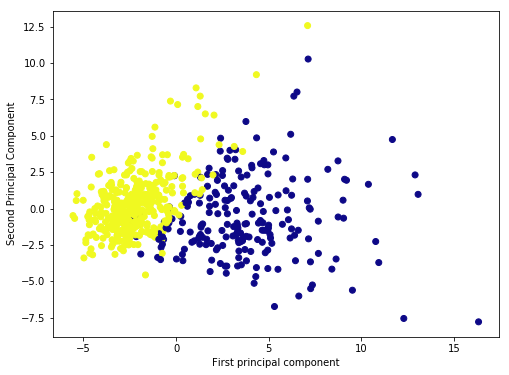

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

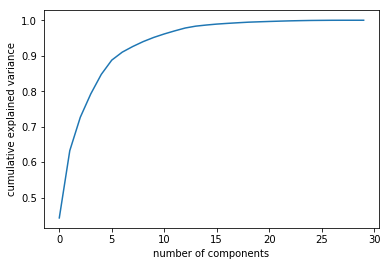

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Interpreting the components

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [13]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap. 

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])


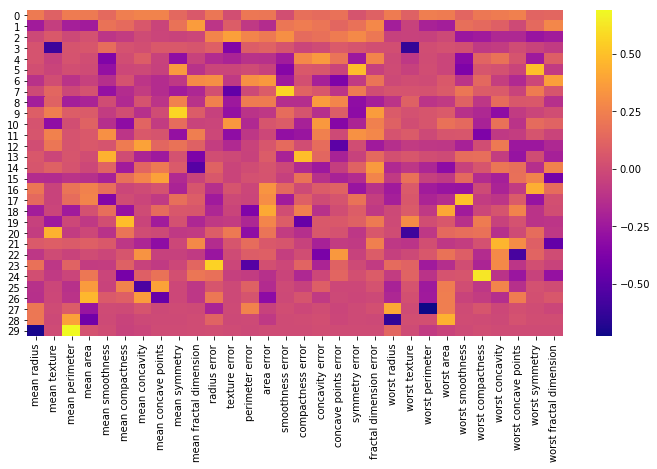

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## REVIEW
* **Unsupervised learning** is used when there are no labels in your data. The 2 most common unsupervised learning tasks are clustering and dimensionality reduction. 

* **K-means** is a non-hierarchical clustering technique with 2 assumptions: 

    1. To compute the "cluster center", you calculate the (arithmetic) mean of all the points belonging to the cluster. Each cluster center is recalculated in the beginning of each new iteration
    2. After the cluster center has been recalculated, if a given point is now closer to a different cluster center than the center of its current cluster, then that point is reassigned to the clostest center

* **PCA** is a method that brings together:

    1. A measure of how each variable is associated with one another. (Covariance matrix.)
    2. The directions in which our data are dispersed. (Eigenvectors.)
    3. The relative importance of these different directions. (Eigenvalues.)
    
PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant.